<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

In [4]:
data_raw = pd.read_csv(path)

In [5]:
df = data_raw.copy()

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    3390
dtype: int64

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
pip install missingno

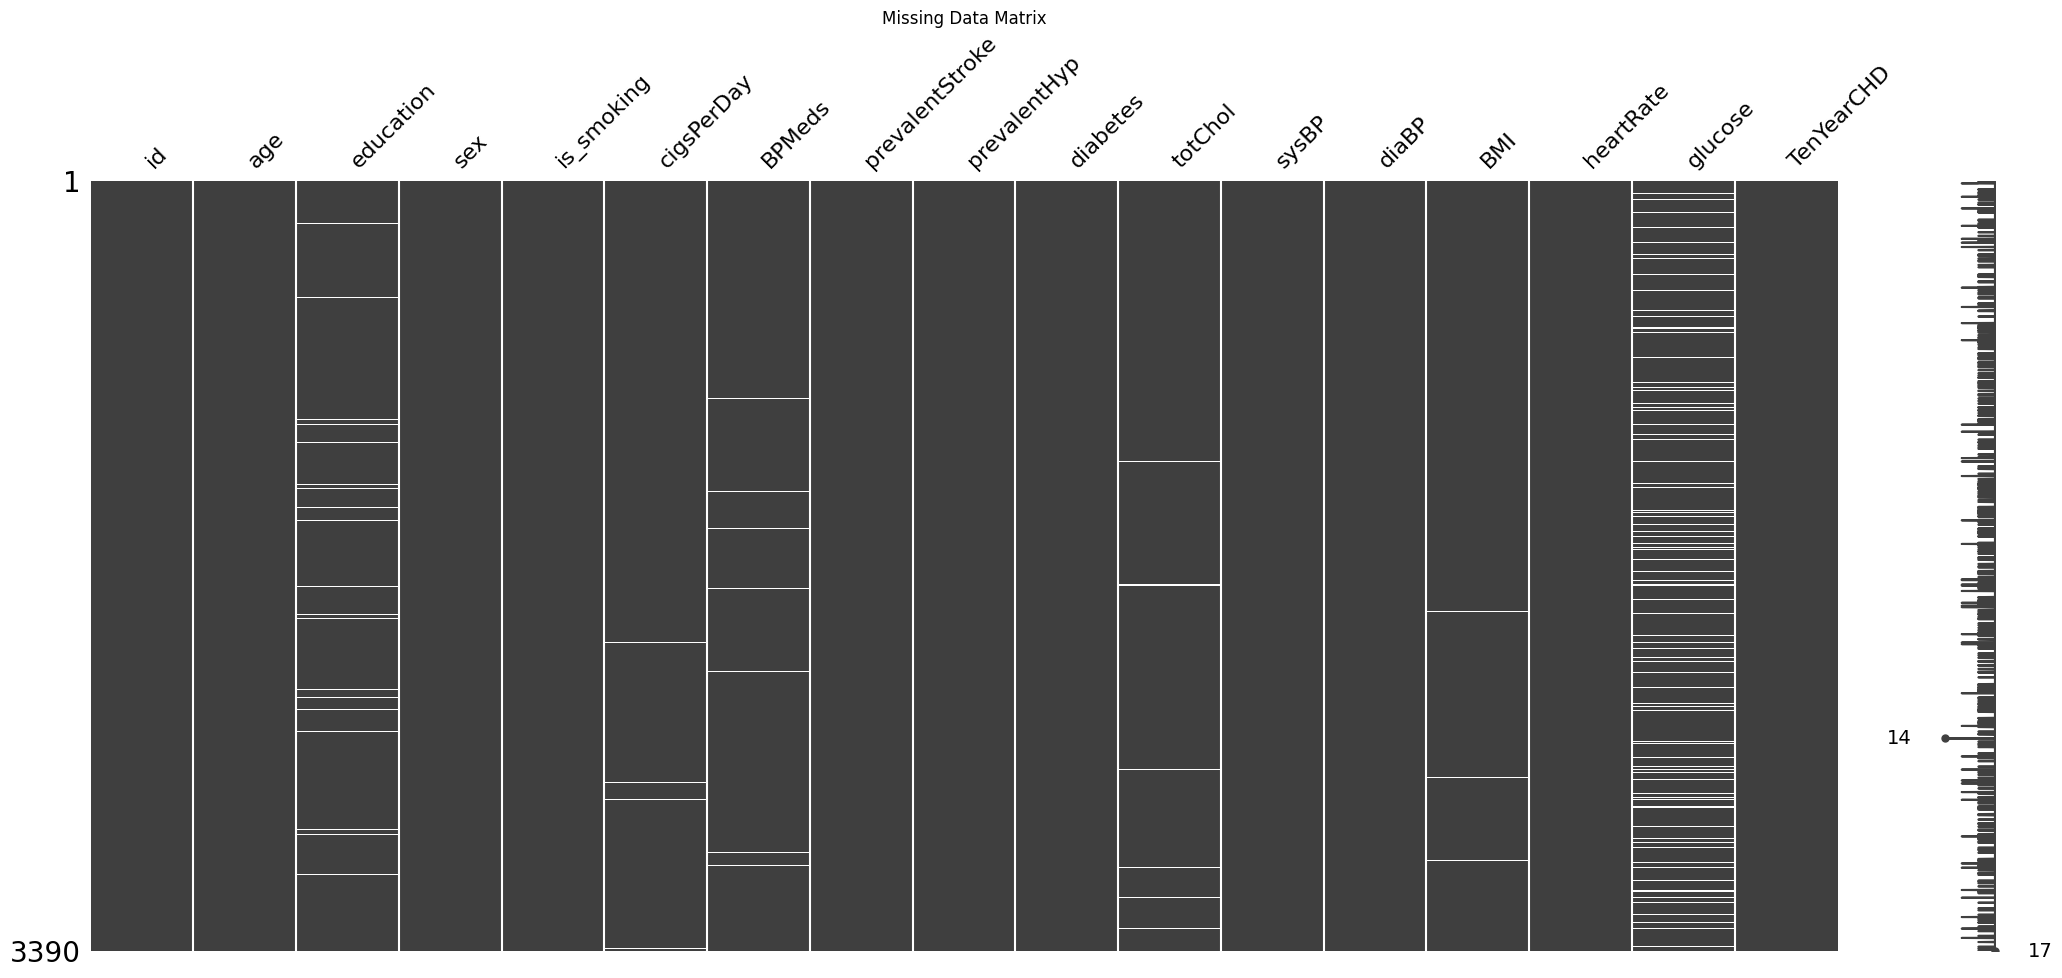

In [13]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include="all")

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
import pandas as pd

# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Drop the 'education' column
df = df.drop('id', axis=1)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

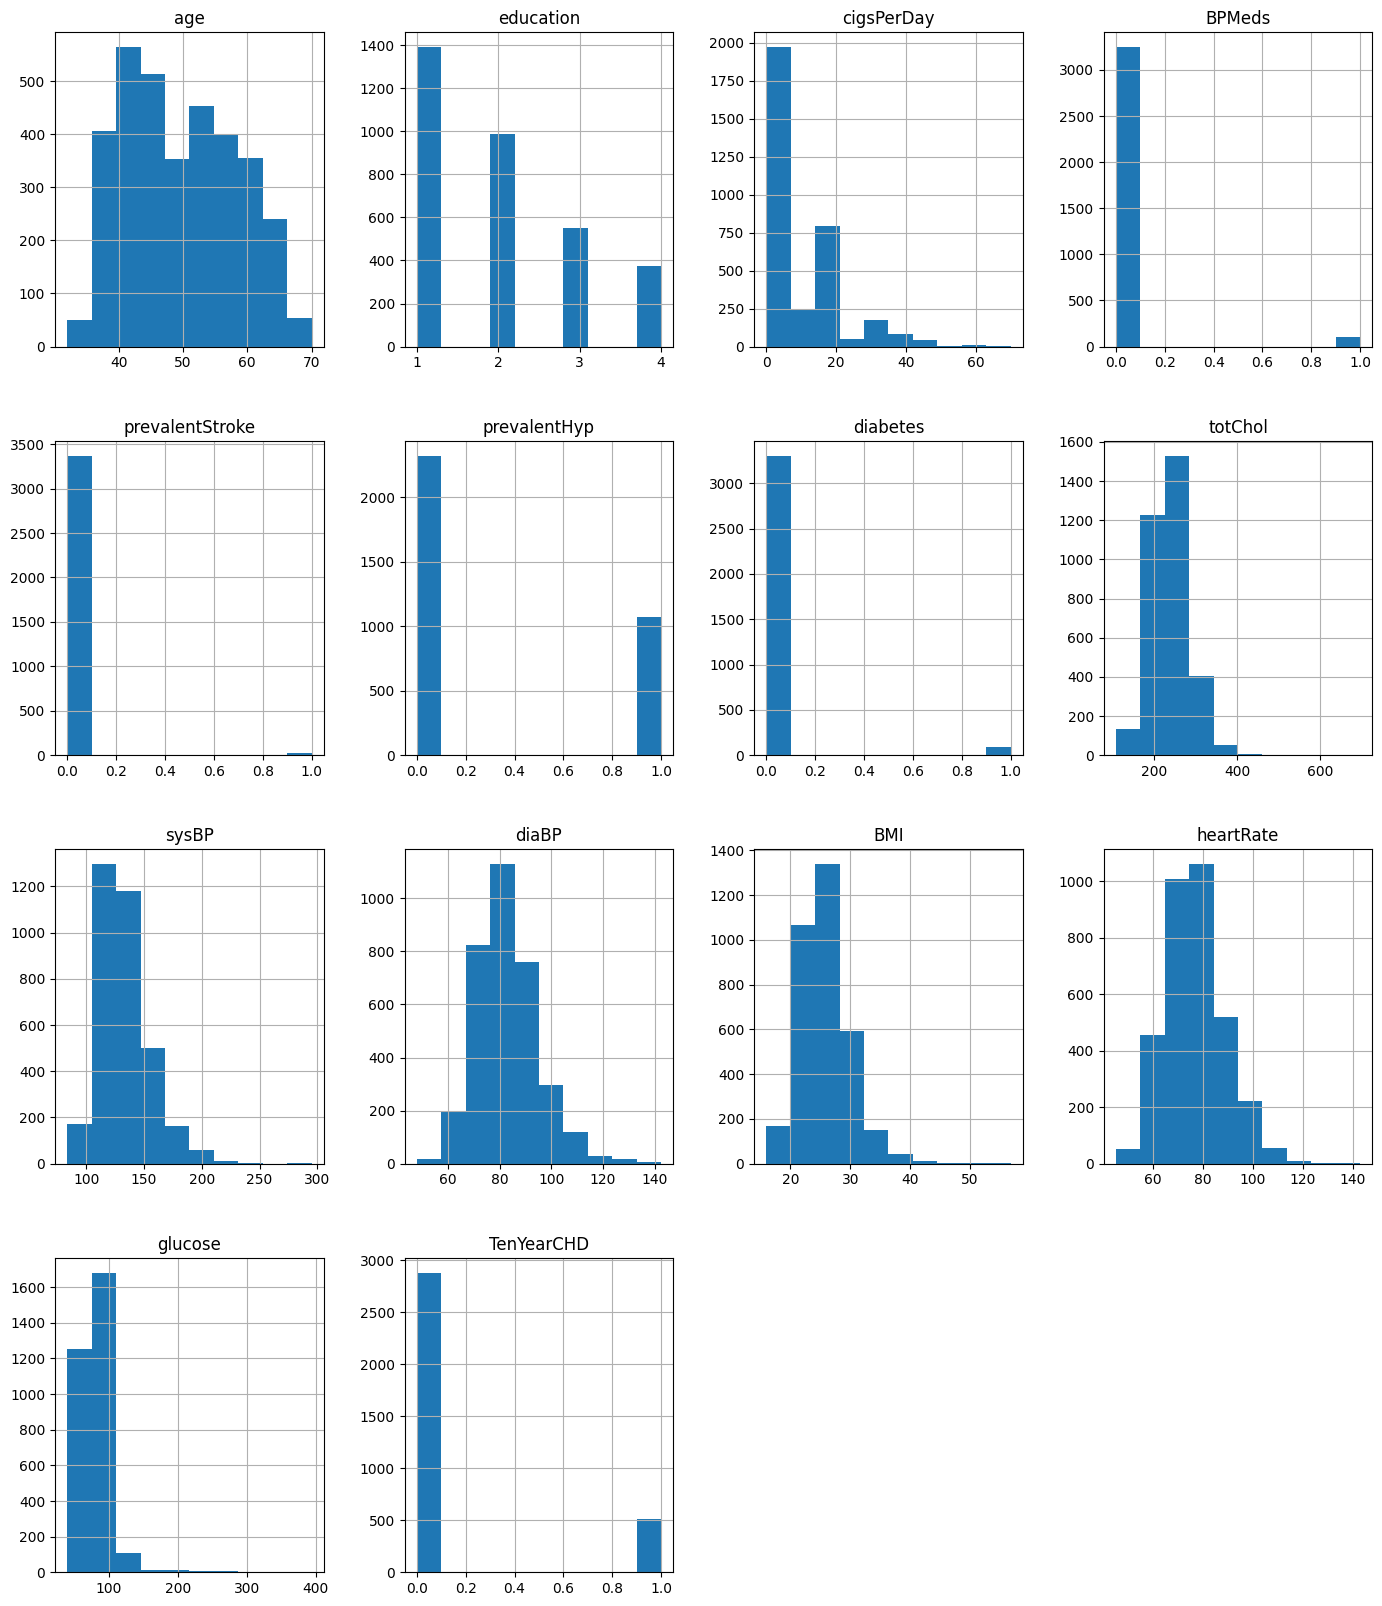

In [18]:
# Visualizing distributions using Histograms:
df.hist(figsize=(17, 20), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [19]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [20]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [21]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [22]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [23]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [24]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [25]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [26]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [27]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [28]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [31]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [32]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Drop the 'education' column
df = df.drop('education', axis=1)

In [37]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [436]:
df[df['cigsPerDay'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [437]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

Mean of 'cigsPerDay': 9.069477434679335


In [438]:
df['cigsPerDay'].fillna(column_mean, inplace=True)

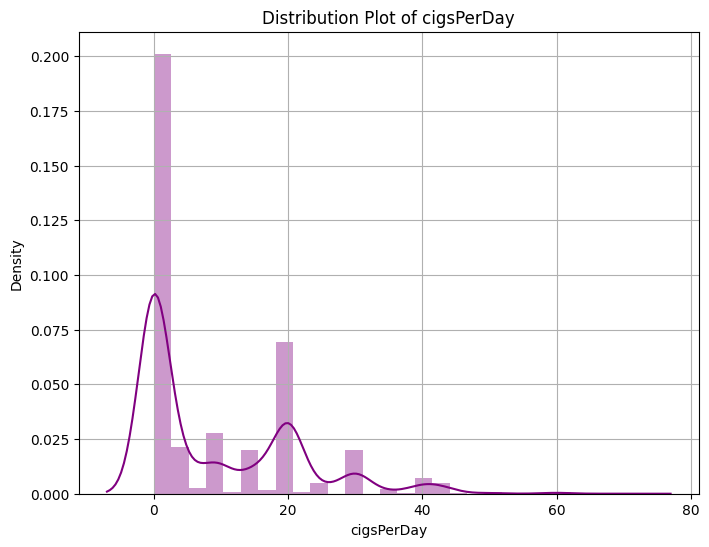

In [439]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['cigsPerDay'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of cigsPerDay')
plt.xlabel('cigsPerDay')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [440]:
df[df['BPMeds'].isna()].head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
8,41,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
102,68,F,NO,0.0,NaN,0,0,0,257.0,144.0,95.0,29.25,80.0,77.0,0
128,67,F,NO,0.0,NaN,0,0,0,261.0,117.0,63.0,22.55,75.0,83.0,0
174,60,F,NO,0.0,NaN,0,1,0,273.0,176.0,84.0,22.17,66.0,79.0,0
194,56,F,NO,0.0,NaN,0,1,0,391.0,126.0,84.0,24.83,80.0,78.0,0


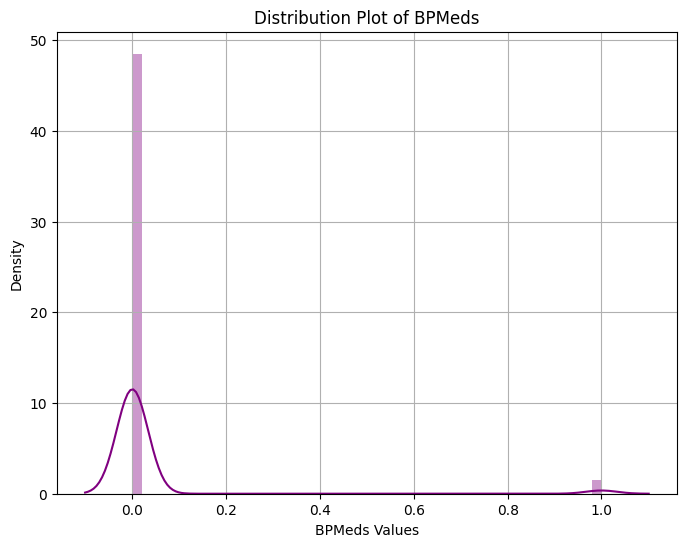

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['BPMeds'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of BPMeds')
plt.xlabel('BPMeds Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [442]:
# Calculate the mode of each column
mode_values = df['BPMeds'].mode().iloc[0]

# Replace NaN values with the mode for each column
df['BPMeds'] = df['BPMeds'].fillna(mode_values)


In [443]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [444]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [445]:
df[df['totChol'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
10,61,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
69,65,M,NO,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
254,52,F,NO,0.0,0.0,0,0,0,NaN,129.0,83.0,32.57,65.0,NaN,0
290,37,F,YES,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
554,38,F,YES,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
625,62,F,YES,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,NaN,0
700,44,F,YES,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
732,61,F,NO,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
797,58,M,NO,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0
808,47,F,YES,20.0,0.0,0,0,0,NaN,121.0,70.0,23.09,80.0,83.0,0


In [446]:
df['totChol'].mean()

237.07428400954655

In [447]:
df['totChol'].mode()

0    240.0
Name: totChol, dtype: float64

In [448]:
df['totChol'].median()

234.0

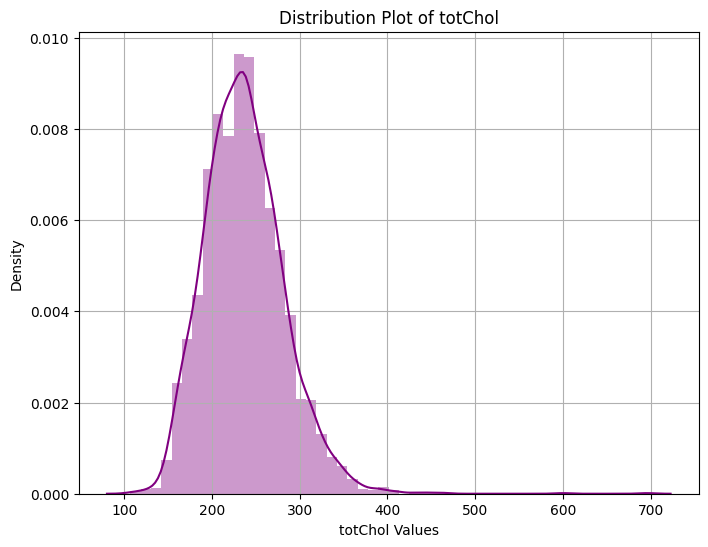

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['totChol'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of totChol')
plt.xlabel('totChol Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [450]:
# Calculate the mean of the 'totChol' column
mean_value = df['totChol'].mean()

# Replace NaN values in the 'totChol' column with the mean value
df['totChol'].fillna(mean_value, inplace=True)

In [451]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [452]:
df[df['BMI'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
54,63,M,YES,20.0,0.0,1,1,0,213.0,163.0,94.0,NaN,76.0,69.0,1
271,47,F,NO,0.0,0.0,0,0,0,195.0,126.0,75.0,NaN,60.0,NaN,1
720,61,F,NO,0.0,0.0,0,1,0,300.0,150.5,89.0,NaN,68.0,72.0,1
1057,64,M,YES,20.0,0.0,0,0,0,225.0,120.0,75.0,NaN,70.0,94.0,0
1875,47,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
1895,38,M,YES,20.0,0.0,0,0,0,215.0,110.0,80.0,NaN,100.0,73.0,0
1947,65,M,NO,0.0,0.0,0,1,1,240.0,235.0,100.0,NaN,68.0,297.0,1
2231,70,F,NO,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1
2385,58,F,YES,1.0,0.0,0,1,0,244.0,160.5,98.0,NaN,86.0,69.0,0


In [453]:
df[df['heartRate'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1388,64,M,YES,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [454]:
df[df['glucose'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,55,F,NO,0.0,0.0,0,1,0,326.000000,144.0,81.0,25.71,85.0,NaN,0
10,61,F,NO,0.0,0.0,0,1,0,237.074284,185.0,121.0,35.22,80.0,NaN,0
36,46,F,NO,0.0,0.0,0,0,0,193.000000,106.5,70.5,26.18,75.0,NaN,0
38,41,F,YES,9.0,1.0,1,1,0,180.000000,114.0,70.0,22.41,92.0,NaN,0
55,51,F,NO,0.0,0.0,0,1,0,351.000000,134.0,97.5,21.66,100.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,40,M,YES,10.0,0.0,0,0,0,195.000000,110.0,70.0,24.75,79.0,NaN,0
3290,67,F,NO,0.0,0.0,0,1,0,237.074284,173.0,100.0,33.60,60.0,NaN,0
3349,46,F,NO,0.0,0.0,0,0,0,242.000000,129.0,85.0,27.40,80.0,NaN,1
3370,46,F,YES,30.0,0.0,0,0,0,219.000000,107.0,69.0,21.40,66.0,NaN,0


In [455]:
df['glucose'].mean()

82.08651976668827

In [456]:
df['glucose'].mode()

0    75.0
Name: glucose, dtype: float64

In [457]:
df['glucose'].median()

78.0

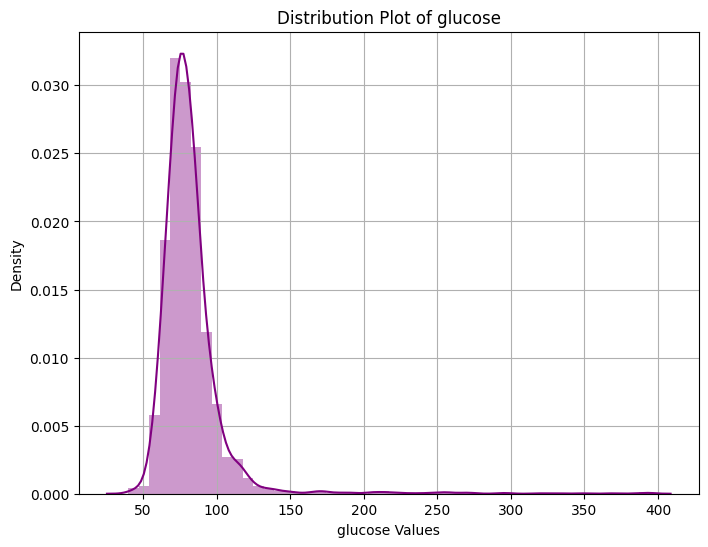

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['glucose'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of glucose')
plt.xlabel('glucose Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [459]:
# Calculate the mode of each column
median_values = df['glucose'].median()

# Replace NaN values with the mode for each column
df['glucose'] = df['glucose'].fillna(median_values)

In [460]:
df.isna().sum()

age                 0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [461]:
#drop the null values of BMI AND HEART RATE COLUMNS
df.dropna(inplace=True)

In [462]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3375 non-null   int64  
 1   sex              3375 non-null   object 
 2   is_smoking       3375 non-null   object 
 3   cigsPerDay       3375 non-null   float64
 4   BPMeds           3375 non-null   float64
 5   prevalentStroke  3375 non-null   int64  
 6   prevalentHyp     3375 non-null   int64  
 7   diabetes         3375 non-null   int64  
 8   totChol          3375 non-null   float64
 9   sysBP            3375 non-null   float64
 10  diaBP            3375 non-null   float64
 11  BMI              3375 non-null   float64
 12  heartRate        3375 non-null   float64
 13  glucose          3375 non-null   float64
 14  TenYearCHD       3375 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 421.9+ KB


In [474]:
# Select the desired columns from 'df'
categorical_column = ['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data_1 = df[categorical_column]

data_1.head()

,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
1,M,NO,0.0,0,1,0,0
2,F,YES,0.0,0,0,0,0
3,M,YES,0.0,0,1,0,1
4,F,YES,0.0,0,0,0,0
5,F,NO,0.0,0,1,0,1


In [466]:
import pandas as pd

# Assuming 'df' is already defined and contains the data

# Select the desired columns from 'df'
selected_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data = df[selected_columns]

data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0
5,61,0.0,272.0,182.0,121.0,32.80,85.0,65.0


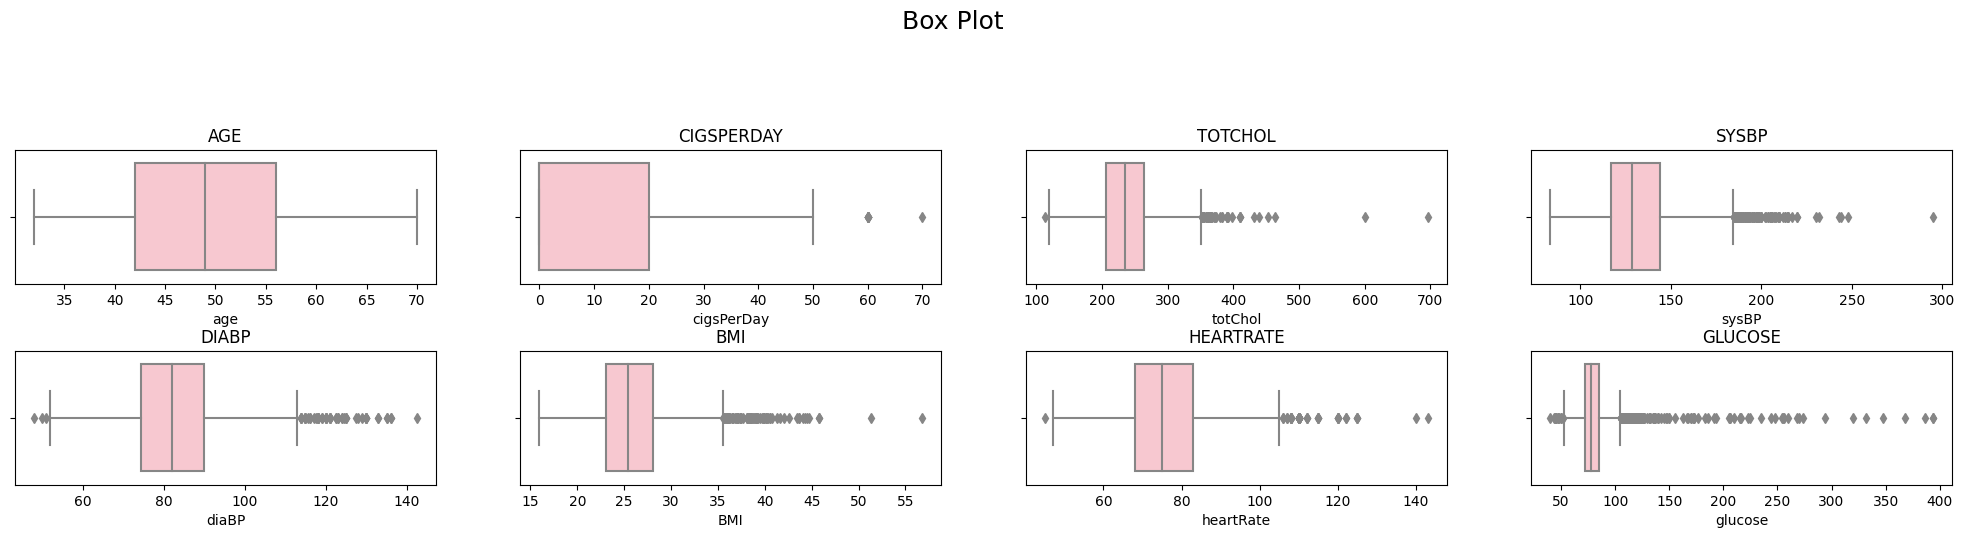

In [467]:
# Handling Outliers & Outlier treatments
df_2 = data.copy()
col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [469]:
# Handling Outliers & Outlier treatments
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(data)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       213
sysBP         103
BMI            77
heartRate      64
diaBP          58
totChol        42
cigsPerDay      9
age             0
dtype: int64


In [470]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    data[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

age 

Percentiles: 25th=42.000, 75th=56.000, IQR=14.000

lower = 21.0 and upper = 77.0 
 
Identified outliers: 0

-------

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 42
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 103
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.020, 75th=28.040, IQR=5.020

lower = 15.49 and upper = 35.57 
 
Identified outliers: 77
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified out

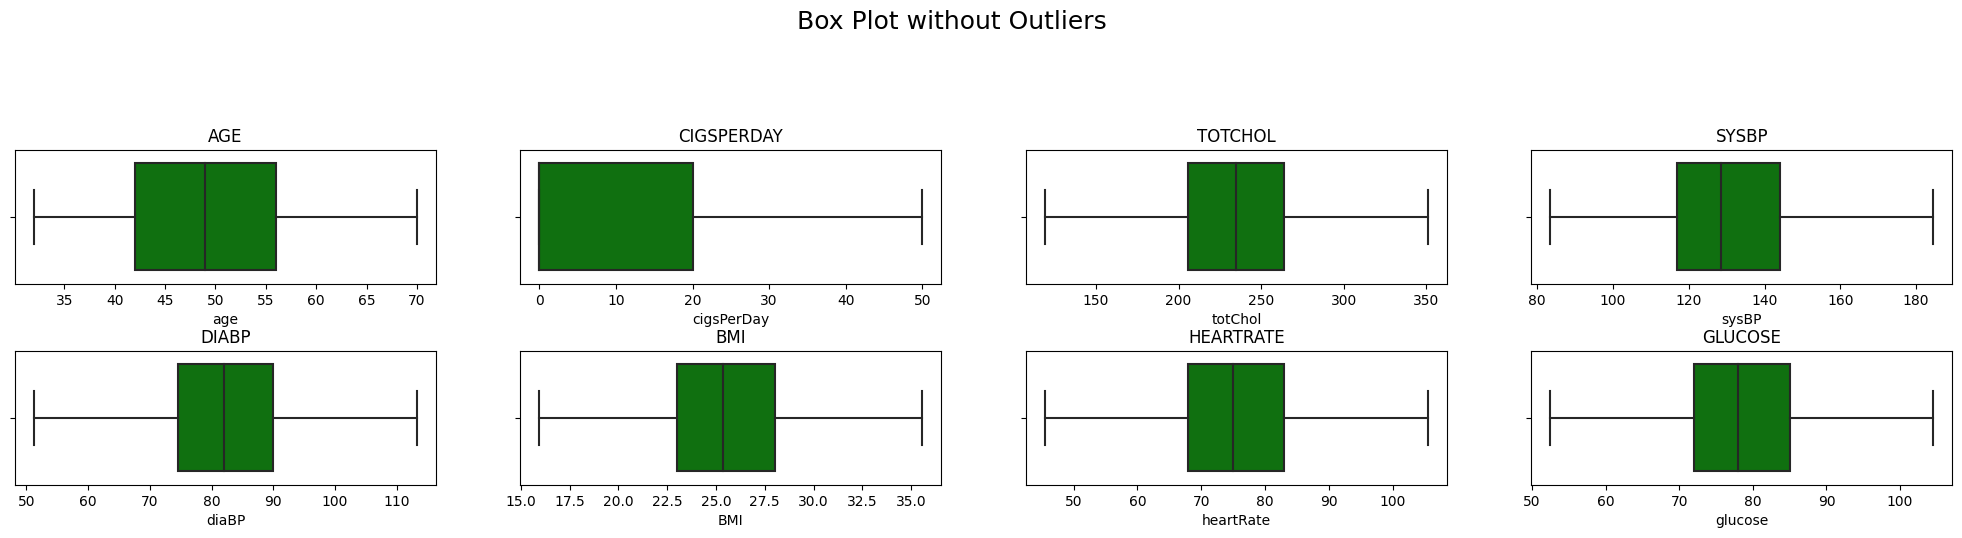

In [471]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [472]:
data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,36,0.0,212.0,168.0,98.00,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.00,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.00,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.00,26.42,70.0,77.0
5,61,0.0,272.0,182.0,113.25,32.80,85.0,65.0


In [478]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_1, data],axis=1)

In [479]:
df_new.shape

(3375, 15)

In [480]:
df_new.head()

,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,M,NO,0.0,0,1,0,0,36,0.0,212.0,168.0,98.00,29.77,72.0,75.0
2,F,YES,0.0,0,0,0,0,46,10.0,250.0,116.0,71.00,20.35,88.0,94.0
3,M,YES,0.0,0,1,0,1,50,20.0,233.0,158.0,88.00,28.26,68.0,94.0
4,F,YES,0.0,0,0,0,0,64,30.0,241.0,136.5,85.00,26.42,70.0,77.0
5,F,NO,0.0,0,1,0,1,61,0.0,272.0,182.0,113.25,32.80,85.0,65.0


In [481]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3375 non-null   object 
 1   is_smoking       3375 non-null   object 
 2   BPMeds           3375 non-null   float64
 3   prevalentStroke  3375 non-null   int64  
 4   prevalentHyp     3375 non-null   int64  
 5   diabetes         3375 non-null   int64  
 6   TenYearCHD       3375 non-null   int64  
 7   age              3375 non-null   int64  
 8   cigsPerDay       3375 non-null   float64
 9   totChol          3375 non-null   float64
 10  sysBP            3375 non-null   float64
 11  diaBP            3375 non-null   float64
 12  BMI              3375 non-null   float64
 13  heartRate        3375 non-null   float64
 14  glucose          3375 non-null   float64
dtypes: float64(8), int64(5), object(2)
memory usage: 421.9+ KB


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [485]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

In [487]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['is_smoking_encoded'] = label_encoder.fit_transform(df_new['is_smoking'])


df_new.drop('is_smoking', axis=1, inplace=True)

In [488]:
df_new.head()

,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_encoded,is_smoking_encoded
1,0.0,0,1,0,0,36,0.0,212.0,168.0,98.00,29.77,72.0,75.0,1,0
2,0.0,0,0,0,0,46,10.0,250.0,116.0,71.00,20.35,88.0,94.0,0,1
3,0.0,0,1,0,1,50,20.0,233.0,158.0,88.00,28.26,68.0,94.0,1,1
4,0.0,0,0,0,0,64,30.0,241.0,136.5,85.00,26.42,70.0,77.0,0,1
5,0.0,0,1,0,1,61,0.0,272.0,182.0,113.25,32.80,85.0,65.0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [341]:
# Expand Contraction

#### 2. Lower Casing

In [342]:
# Lower Casing

#### 3. Removing Punctuations

In [343]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [344]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [345]:
# Remove Stopwords

In [346]:
# Remove White spaces

#### 6. Rephrase Text

In [347]:
# Rephrase Text

#### 7. Tokenization

In [348]:
# Tokenization

#### 8. Text Normalization

In [349]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [350]:
# POS Taging

#### 10. Text Vectorization

In [351]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [352]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [353]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [354]:
# Transform Your data

### 6. Data Scaling

In [355]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [356]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [357]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [358]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [359]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [360]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [361]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [362]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [363]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [364]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [365]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [366]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [367]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [368]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***